# Load pkl file and output graphs for further analysis in R, this file is for M07357 analysis, see its eigenvectors
1. Extract the matrix from an ECR results pickle file
2. Correct the matrix by removing connections that are likely incorrect

In [1]:
import numpy as np
import pickle as pkl
import pandas as pd
from pprint import pprint
import os
import matplotlib
import matplotlib.pyplot as plt
import glob

plt.ion()

In [9]:
ls /cis/project/organoid/May_31_2025/250314/misc/M07357/Network/000389

analysis/  data.raw.h5  mxassay.metadata  mxassay.results


In [10]:
ls /cis/project/organoid/Aug_25_2025_Mo7357/Network/000389/

analysis/  data.raw.h5  mxassay.metadata  mxassay.results


In [1]:
ls /cis/project/organoid/

'2024May28 No window data '/
 3_org_stim_vs_1_organoid/
'April 19 2024'/
 Aug_25_2025_Mo7357/
 Aug_25_2025_Mo7357_ecr_results_no_window/
 Aug_28_2025_Mo7357_ecr_results_no_window_try2/
 Aug_29_2025_Mo7357_ecr_results_no_window_para2/
 Dec_10_2024/
 Dec_10_2024_ecr_results_no_window/
 Dec_10_2024_ecr_results_tuning_exp/
 Dec_29_2024_ecr_results/
'March 30 2024'/
 May_31_2025/
 May_31_2025_ecr_results_no_window/
 Nov_18_2024/
 Nov_18_2024_ecr_results3_no_window/
 Nov_18_2024_ecr_results_for_tuning/
 Sep_1_2025_Mo7357_ecr_results_no_window_para3/
 Sep_1_2025_Mo7357_ecr_results_window_para1/


### copy the other M07357( which is in the MO vs SO dataset) recording to the new M07357 folder

import shutil
import os
source_dir = "/cis/project/organoid/May_31_2025/250314/misc/M07357/Network/000389"
dest_dir = "/cis/project/organoid/Aug_25_2025_Mo7357/Network/"

try:
    # Use shutil.copytree to recursively copy the directory
    shutil.copytree(source_dir, os.path.join(dest_dir, "000389"))
    print(f"Successfully copied folder to {dest_dir}")

except FileExistsError:
    print(f"Error: A folder named '000389' already exists in the destination.")
except Exception as e:
    print(f"An error occurred: {e}")

In [4]:

# Path of source .pkl result files
#path_source_files = '/cis/project/organoid/Aug_25_2025_Mo7357_ecr_results_no_window'
#path_source_files = '/cis/project/organoid/Aug_28_2025_Mo7357_ecr_results_no_window_try2'
path_source_files = '/cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2'

# Get a list of files that we'll analyze (pkl files in the source directory or its subdirectories)
filenames = glob.glob(f'{path_source_files}/**/*.pkl', recursive=True)
n_chars = len(path_source_files)
filenames = [f[n_chars:] for f in filenames]
filenames.sort()
filenames.reverse()

print(f'Found {len(filenames)} pkl files to process.')
filenames

Found 3 pkl files to process.


['/Network/000389/data.raw_20250829_10h42m.pkl',
 '/Network/000145/data.raw_20250829_10h42m.pkl',
 '/Network/000143/data.raw_20250829_10h42m.pkl']

In [5]:
filenames = [os.path.join(path_source_files, filename.lstrip('/')) for filename in filenames]
filenames

['/cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2/Network/000389/data.raw_20250829_10h42m.pkl',
 '/cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2/Network/000145/data.raw_20250829_10h42m.pkl',
 '/cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2/Network/000143/data.raw_20250829_10h42m.pkl']

In [6]:
def filter_matrix_TC(data, well):

    # Extract necessary data from the loaded data structure
    adj_matrix = data[well]['win_0']['adj_matrix_predicted']
    votes = data[well]['win_0']['votes']  # This variable is loaded but not used in the snippet you provided
    corr_peaks = data[well]['win_0']['corr_peaks']
    fs = data['config']['data']['fs']  # Sampling frequency

    # Initialize a matrix to track synchronization based on correlation peaks
    synced_matrix = np.full(adj_matrix.shape, False)
    for key in corr_peaks.keys():
        if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/fs):
            synced_matrix[key[0], key[1]] = True
            synced_matrix[key[1], key[0]] = True

    # Create the filtered matrix as per the given logic
    filtered_matrix = np.logical_and(adj_matrix, np.logical_not(synced_matrix))

    return filtered_matrix

## Load Effective Connecivity Reconstruction (ECR) data from a pickle file
### M07357

In [7]:
## no filter 

for i in range(len(filenames)):
    with open(filenames[i], 'rb') as f:
        data = pkl.load(f)
        print(data['config']['windows'])
    for well in ['well000', 'well001', 'well002',  'well003' , 'well004' , 'well005']:
        if well in data:
            #adj = filter_matrix_TC(data, well)
            adj = data[well]['win_0']['adj_matrix_predicted']
            print(f"Processing file: {filenames[i][n_chars:]}, Well: {well}, Num of edges: {sum(sum(adj))}, Num of nodes: {adj.shape[0]}")
        else:
            print(f"Well {well} not found in file: {filenames[i][n_chars:]}")

{'win_dur': 'None', 'win_overlap_dur': 0}
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well000, Num of edges: 12714, Num of nodes: 567
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well001, Num of edges: 147179, Num of nodes: 1008
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well002, Num of edges: 39943, Num of nodes: 976
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well003, Num of edges: 89470, Num of nodes: 992
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well004, Num of edges: 96501, Num of nodes: 995
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well005, Num of edges: 522, Num of nodes: 167
{'win_dur': 'None', 'win_overlap_dur': 0}
Processing file: /Network/000145/data.raw_20250829_10h42m.pkl, Well: well000, Num of edges: 6479, Num of nodes: 846
Processing file: /Network/000145/data.raw_20250829_10h42m.pkl, Well: well001, Num of edges: 139128

In [14]:
filenames[1]

'/cis/project/organoid/Aug_25_2025_Mo7357_ecr_results_no_window/Network/000143/data.raw_20250827_21h29m.pkl'

In [8]:
data['config']

{'paths': {'source_files': '/cis/project/organoid/Aug_25_2025_Mo7357',
  'results': '/cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2'},
 'data': {'fs': 10000,
  'spike_amp_thresh_percentile': 5,
  'corr_amp_thresh_percentile': None,
  'corr_amp_thresh_std': 1},
 'windows': {'win_dur': 'None', 'win_overlap_dur': 0},
 'super_sel': {'recompute': False,
  'adj_threshold': 0.75,
  'raster_dur': 0.0005,
  'corr_type': 'cc',
  'n_corr_peaks_max': 4,
  'epsilon': 0.003,
  'T_list': [0.0225, 0.02, 0.0175, 0.016],
  'sigma_list': [0.0004, 0.00055, 0.0007]}}

In [9]:
## filtered 
for i in range(len(filenames)):
    with open(filenames[i], 'rb') as f:
        data = pkl.load(f)
        print(data['config']['windows'])
    for well in ['well000', 'well001', 'well002',  'well003' , 'well004' , 'well005']:
        if well in data:
            adj = filter_matrix_TC(data, well)
            #adj = data[well]['win_0']['adj_matrix_predicted']
            print(f"Processing file: {filenames[i][n_chars:]}, Well: {well}, Num of edges: {sum(sum(adj))}, Num of nodes: {adj.shape[0]}")
        else:
            print(f"Well {well} not found in file: {filenames[i][n_chars:]}")

{'win_dur': 'None', 'win_overlap_dur': 0}
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well000, Num of edges: 9764, Num of nodes: 567
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well001, Num of edges: 71845, Num of nodes: 1008
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well002, Num of edges: 22393, Num of nodes: 976
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well003, Num of edges: 42029, Num of nodes: 992
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well004, Num of edges: 51234, Num of nodes: 995
Processing file: /Network/000389/data.raw_20250829_10h42m.pkl, Well: well005, Num of edges: 43, Num of nodes: 167
{'win_dur': 'None', 'win_overlap_dur': 0}
Processing file: /Network/000145/data.raw_20250829_10h42m.pkl, Well: well000, Num of edges: 6443, Num of nodes: 846
Processing file: /Network/000145/data.raw_20250829_10h42m.pkl, Well: well001, Num of edges: 138509, N

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f31fd5c69e0>>
Traceback (most recent call last):
  File "/cis/home/tchen94/anaconda3/envs/oi_ecr/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


{'win_dur': 'None', 'win_overlap_dur': 0}
Well well000 not found in file: /Network/000143/data.raw_20250829_10h42m.pkl
Processing file: /Network/000143/data.raw_20250829_10h42m.pkl, Well: well001, Num of edges: 137468, Num of nodes: 1018
Processing file: /Network/000143/data.raw_20250829_10h42m.pkl, Well: well002, Num of edges: 123623, Num of nodes: 1009
Processing file: /Network/000143/data.raw_20250829_10h42m.pkl, Well: well003, Num of edges: 134135, Num of nodes: 1013
Processing file: /Network/000143/data.raw_20250829_10h42m.pkl, Well: well004, Num of edges: 97758, Num of nodes: 1014
Processing file: /Network/000143/data.raw_20250829_10h42m.pkl, Well: well005, Num of edges: 2443, Num of nodes: 528


In [10]:
# Define the output directory
#output_path = "/cis/home/tchen94/tianyi/Organoid/Raw_data_processing/adjacency_edges_Aug_28_2025_M07357.csv"
#output_path = "/cis/home/tchen94/tianyi/Organoid/Raw_data_processing/adjacency_edges_Aug_29_2025_M07357_try2.csv"
output_path = "/cis/home/tchen94/tianyi/Organoid/Raw_data_processing/adjacency_edges_Sep_1_2025_M07357_para2.csv"

# Initialize a list to store the edge data
edge_data_list = []

# Iterate through all files
for file_idx, filename in enumerate(filenames):
    print(f"Processing file {file_idx + 1}/{len(filenames)}: {filename}")
    with open(filename, 'rb') as f:
        data = pkl.load(f)
    
    # Process each well
    for well_idx, well in enumerate(['well000', 'well001', 'well002', 'well003', 'well004', 'well005']):
        if well in data:
            # Log well progress
            print(f"  Processing well {well_idx + 1}/6: {well}")
            # Get the adjacency matrix
            adj = filter_matrix_TC(data, well)  # Assumes adj is a NumPy array of True/False
            
            # Find row and column indices where adj is True
            rows, cols = adj.nonzero()  # Directly use the nonzero indices
            
            # Record the edges
            for row, col in zip(rows, cols):
                edge_data_list.append({
                    "File": filename,
                    "Well": well,
                    "Row": row,
                    "Column": col,
                    "dim": adj.shape[0]
                })

Processing file 1/3: /cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2/Network/000389/data.raw_20250829_10h42m.pkl
  Processing well 1/6: well000
  Processing well 2/6: well001
  Processing well 3/6: well002
  Processing well 4/6: well003
  Processing well 5/6: well004
  Processing well 6/6: well005
Processing file 2/3: /cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2/Network/000145/data.raw_20250829_10h42m.pkl
  Processing well 1/6: well000
  Processing well 2/6: well001
  Processing well 3/6: well002
  Processing well 4/6: well003
  Processing well 5/6: well004
  Processing well 6/6: well005
Processing file 3/3: /cis/project/organoid/Aug_29_2025_Mo7357_ecr_results_no_window_para2/Network/000143/data.raw_20250829_10h42m.pkl
  Processing well 2/6: well001
  Processing well 3/6: well002
  Processing well 4/6: well003
  Processing well 5/6: well004
  Processing well 6/6: well005


In [11]:
# Convert the edge data to a DataFrame
edge_df = pd.DataFrame(edge_data_list)

# Save the DataFrame as a CSV file
edge_df.to_csv(output_path, index=False)

print(f"Edge data successfully saved to {output_path}")

Edge data successfully saved to /cis/home/tchen94/tianyi/Organoid/Raw_data_processing/adjacency_edges_Sep_1_2025_M07357_para2.csv


## Stop here

In [7]:

# Define the output file path for the dimensions table
output_path = "/cis/home/tchen94/tianyi/Organoid/Raw_data_processing/matrix_dimensions.csv"

# Initialize a list to store the dimension data
dimension_data_list = []

# Iterate through all files
for file_idx, filename in enumerate(filenames):
    print(f"Processing file {file_idx + 1}/{len(filenames)}: {filename}")
    with open(filename, 'rb') as f:
        data = pkl.load(f)
    
    # Process each well
    for well in ['well000', 'well001', 'well002', 'well003', 'well004', 'well005']:
        if well in data:
            # Get the adjacency matrix
            adj = filter_matrix_TC(data, well)  # Assumes adj is a NumPy array
            
            # Record the dimensions of the matrix
            n_rows, n_cols = adj.shape
            dimension_data_list.append({
                "File": filename,
                "Well": well,
                "Row_dim": n_rows,
                "Column_dim": n_cols
            })

# Convert the dimension data to a DataFrame
dimension_df = pd.DataFrame(dimension_data_list)

# Save the DataFrame as a CSV file
dimension_df.to_csv(output_path, index=False)

print(f"Dimension table successfully saved to {output_path}")

Processing file 1/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07915/Stimulation/000295/data.raw_20241213_18h15m.pkl
Processing file 2/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07915/Stimulation/000291/data.raw_20241213_18h15m.pkl
Processing file 3/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07915/Network/000296/data.raw_20241213_18h15m.pkl
Processing file 4/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07915/Network/000293/data.raw_20241213_18h15m.pkl
Processing file 5/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07915/Network/000290/data.raw_20241213_18h15m.pkl
Processing file 6/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07915/ActivityScan/000289/data.raw_20241213_18h15m.pkl
Processing file 7/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07914/Stimulation/000301/data.raw_20241213_18h15m.pkl
Processing file 8/12: /cis/project/organoid/Dec_29_2024_ecr_results/M07914/Stimulation/000299/data.raw_20241213_18h15m.pkl
Processing file 9/12: /cis/

## Show some of the keys in the hierarchical dictionary

In [56]:
print(data.keys())
print(data['well000'].keys())
print(data['well000']['win_0'].keys())

dict_keys(['source_filename', 'config', 'well000', 'well001', 'well002', 'well003', 'well004', 'well005'])
dict_keys(['spike_amp_thresh', 'channel_numbers', 'channel_spikes_per_sec', 'win_0'])
dict_keys(['adj_matrix_predicted', 'votes', 'corr_peaks'])


## View time periods over which ECR matrices were computed

Duration of windows and their overlap is given in the 'config' section of the data dict. If the window duration is `None` then the full duration of the recording was used to compute connectivity over a single "window."

In [28]:
print(data['config']['windows'])

{'win_dur': 'None', 'win_overlap_dur': 0}


## Data description

For each well (organoid) and time window, there are three key/value pairs. For matrix values, the first dimension is the ID of the presynaptic neuron and the second dimension is that of the postsynaptic neuron.

1. `votes`: The votes matrix. votes[i, j] is the fraction of trials in which a directed connection was predicted to exist from neuron i to neuron j.
2. `adj_matrix_predicted`: The predicted adjacency matrix. This is a Boolean matrix where adj_matrix_predicted[i, j]==True indicates that votes[i, j]==1.
3. `corr_peaks`: corr_peaks is a dict with keys of the form (i, j). corr_peaks[(i, j)] is a dict with lists `amplitudes` and `delays` that indicate the correlation peaks between neuron i and neuron j.

__Note:__ Neurons pairs linked only by correlation peaks with delays lower than t_res (the raw recording's sampling resolution) may actually be simultaneously stimulated by some common/global source, rather than casually linked. It may be desirable to remove such connections, as demonstrated in the code below.

## View an uncorrected adjacency matrix

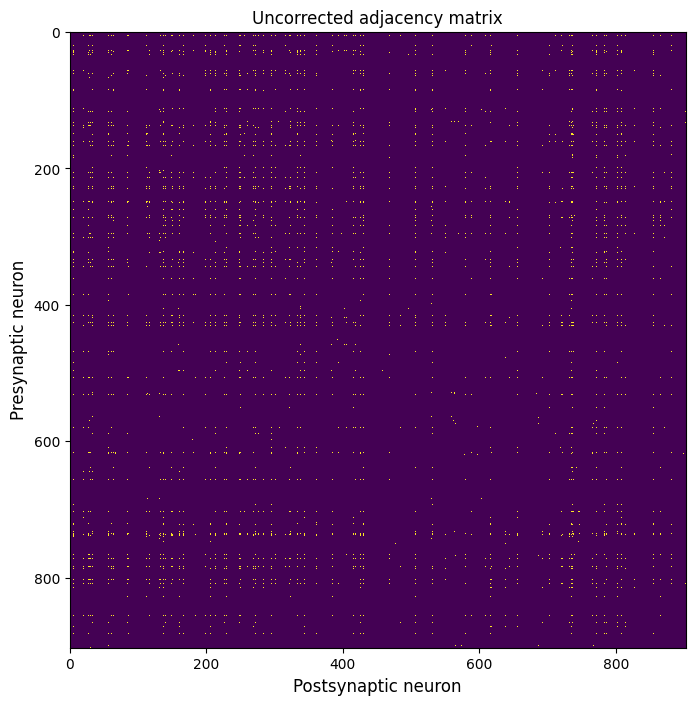

In [29]:
well = 'well001'
win = 'win_0'

adj_matrix = data[well][win]['adj_matrix_predicted']
votes = data[well][win]['votes']
corr_peaks = data[well][win]['corr_peaks']

fontsize = 12
plt.figure(figsize=(8, 8))
plt.imshow(adj_matrix, interpolation='nearest')
plt.title('Uncorrected adjacency matrix', fontsize=fontsize)
plt.ylabel('Presynaptic neuron', fontsize=fontsize)
_ = plt.xlabel('Postsynaptic neuron', fontsize=fontsize)

## View a "corrected" adjacency matrix

Putative connections that are likely be due to a common or global source rather than causal from neuron to neuron, or removed.

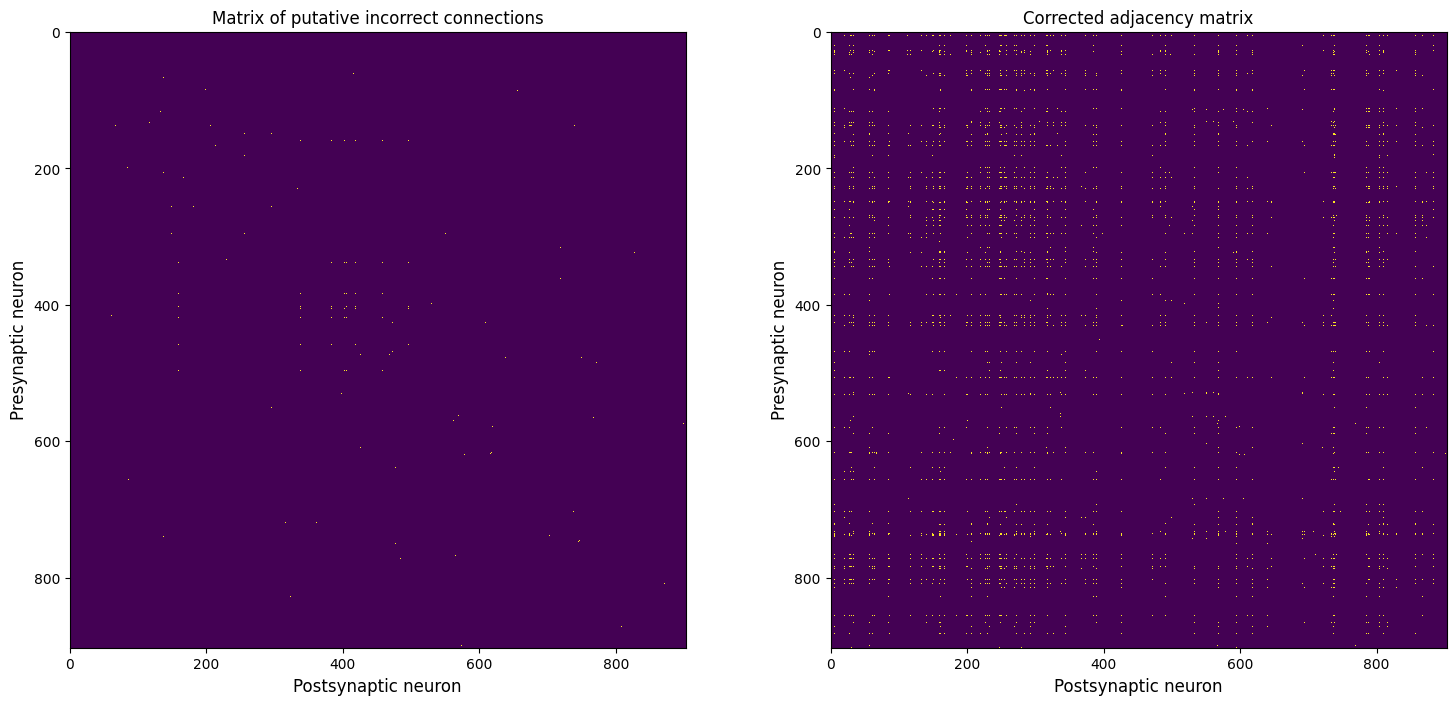

In [30]:
# Neurons pairs linked only by correlation peak delays lower than t_res may actually
# be simultaneously stimulated by some common/global source, rather than casually linked.
# We can identify those pairs and remove their link from the adjacency matrix if we'd like to.
synced_matrix = np.full(adj_matrix.shape, False)
for key in corr_peaks.keys():
    if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/data['config']['data']['fs']):
        synced_matrix[key[0], key[1]] = True
        synced_matrix[key[1], key[0]] = True
filtered_matrix = np.logical_and(data[well][win]['adj_matrix_predicted'], np.logical_not(synced_matrix))

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.imshow(synced_matrix, interpolation='nearest')
plt.title('Matrix of putative incorrect connections', fontsize=fontsize)
plt.ylabel('Presynaptic neuron', fontsize=fontsize)
plt.xlabel('Postsynaptic neuron', fontsize=fontsize)

plt.subplot(1, 2, 2)
plt.imshow(filtered_matrix, interpolation='nearest')
plt.title('Corrected adjacency matrix', fontsize=fontsize)
plt.ylabel('Presynaptic neuron', fontsize=fontsize)
_ = plt.xlabel('Postsynaptic neuron', fontsize=fontsize)

# View a "corrected" adjacency matrix in which unconnected neurons are moved from the matrix

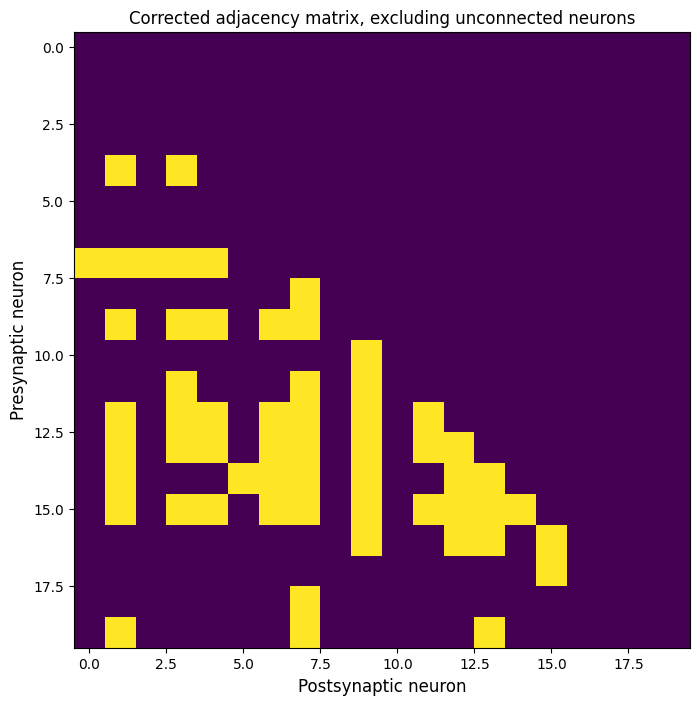

In [19]:
# Finally, let's remove the neurons that have no connections, and remove them.
ix_connected_col = np.argwhere(np.any(filtered_matrix>0, axis=0))[:, 0]
ix_connected_row = np.argwhere(np.any(filtered_matrix>0, axis=1))[:, 0]
ix_connected = np.union1d(ix_connected_col, ix_connected_row)
plt.figure(figsize=(8, 8))
plt.imshow(filtered_matrix[ix_connected][:, ix_connected], interpolation='nearest')
plt.title('Corrected adjacency matrix, excluding unconnected neurons', fontsize=fontsize)
plt.ylabel('Presynaptic neuron', fontsize=fontsize)
_ = plt.xlabel('Postsynaptic neuron', fontsize=fontsize)